In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
loan = pd.read_csv(os.path.abspath(os.getcwd() + os.sep + os.pardir) + '\\data\\train_loanpred.csv')
tree_loan_cols = ['Gender', 'Married', 'Education',
                  'Self_Employed','ApplicantIncome', 'LoanAmount','Property_Area', 'Loan_Status']
tree_loan = loan[tree_loan_cols]
tree_loan.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,NaN,Urban,Y
1,Male,Yes,Graduate,No,4583,128.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,66.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,120.0,Urban,Y
4,Male,No,Graduate,No,6000,141.0,Urban,Y


In [5]:
tree_loan.dropna(how='any', axis=0, inplace=True)
tree_loan.isna().sum().sort_values(ascending=False)
tree_loan.describe()
tree_loan.describe(include='O')

Gender             0
Married            0
Education          0
Self_Employed      0
ApplicantIncome    0
LoanAmount         0
Property_Area      0
Loan_Status        0
dtype: int64

,ApplicantIncome,LoanAmount
count,546.000000,546.000000
mean,5266.661172,144.472527
std,5444.841870,81.882374
min,150.000000,9.000000
25%,2890.500000,100.000000
50%,3839.500000,127.000000
75%,5811.250000,169.500000
max,81000.000000,650.000000


,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,546,546,546,546,546,546
unique,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Semiurban,Y
freq,445,356,426,471,211,378


<h1> Numerical - Scaling

In [35]:
#standardization
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
std_tree_loan = stdscaler.fit_transform(tree_loan.loc[:,tree_loan.dtypes !=object])
print("Mean: ", std_tree_loan.mean(axis=0))
print("S.D: ", std_tree_loan.std(axis=0))
print("Min: ", std_tree_loan.min(axis=0))
print("Max: ", std_tree_loan.max(axis=0))

Mean:  [-7.15748177e-17 -2.60272064e-17]
S.D:  [1. 1.]
Min:  [-0.94058805 -1.65599446]
Max:  [13.92194464  6.1794868 ]


In [46]:
#normalization (min-max scaler)
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
norm_tree_loan = minmaxscaler.fit_transform(tree_loan.loc[:,tree_loan.dtypes !=object])
print("Mean: ", norm_tree_loan.mean(axis=0))
print("S.D: ", norm_tree_loan.std(axis=0))
print("Min: ", norm_tree_loan.min(axis=0))
print("Max: ", norm_tree_loan.max(axis=0))

Mean:  [0.06328585 0.2113456 ]
S.D:  [0.06728328 0.12762458]
Min:  [0. 0.]
Max:  [1. 1.]


In [8]:
def draw_plt(transformation, method):
    fig = plt.figure(figsize=(8,2))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set(title="Before " + method)
    sns.kdeplot(tree_loan['ApplicantIncome'], ax = ax1)
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.set(title="After " + method)
    sns.kdeplot(transformation, ax = ax2)

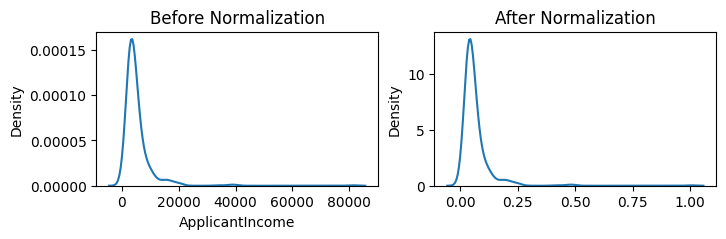

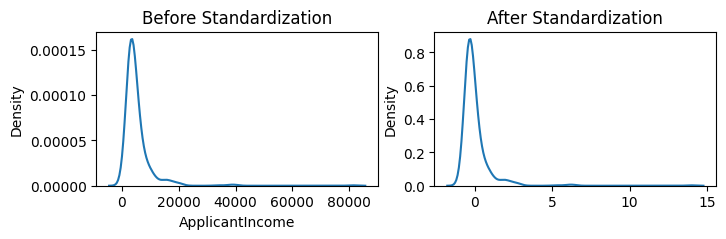

In [69]:
draw_plt(norm_tree_loan[:,0], "Normalization")
draw_plt(std_tree_loan[:,0], "Standardization")

<Axes: >

Text(0.5, 1.0, 'Before normalization')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'After normalization')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'After standardization')

<Axes: >

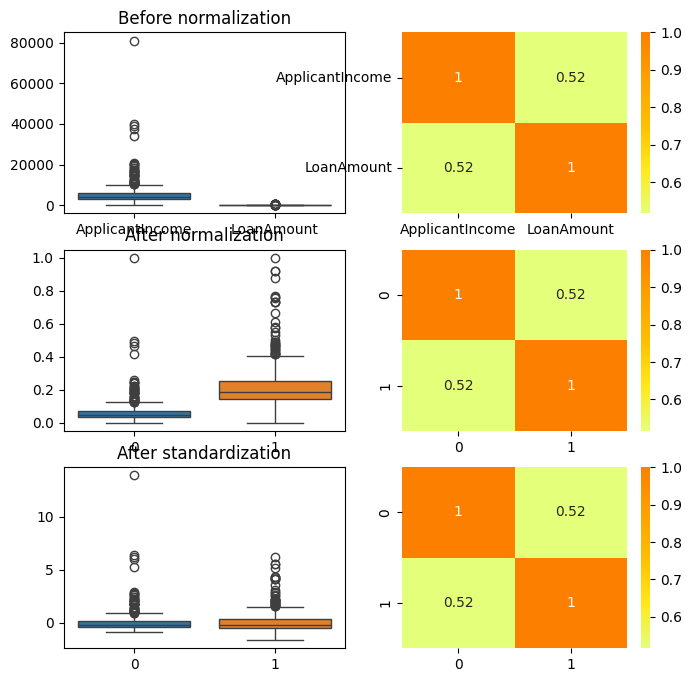

In [70]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2)
fig.set_figheight(8) 
fig.set_figwidth(8) 
sns.boxplot(data=tree_loan, ax = ax1)
ax1.set_title("Before normalization")
corr = tree_loan.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, cmap = 'Wistia', annot=True, ax=ax2)

#after normalization
sns.boxplot(data=norm_tree_loan, ax = ax3)
ax3.set_title("After normalization")
norm_corr = pd.DataFrame(norm_tree_loan).corr(method='pearson', numeric_only=True)
sns.heatmap(norm_corr, cmap = 'Wistia', annot=True, ax = ax4)

#after standardization
sns.boxplot(data=std_tree_loan, ax = ax5)
ax5.set_title("After standardization")
std_corr = pd.DataFrame(std_tree_loan).corr(method='pearson')
sns.heatmap(std_corr, cmap = 'Wistia', annot=True, ax=ax6)

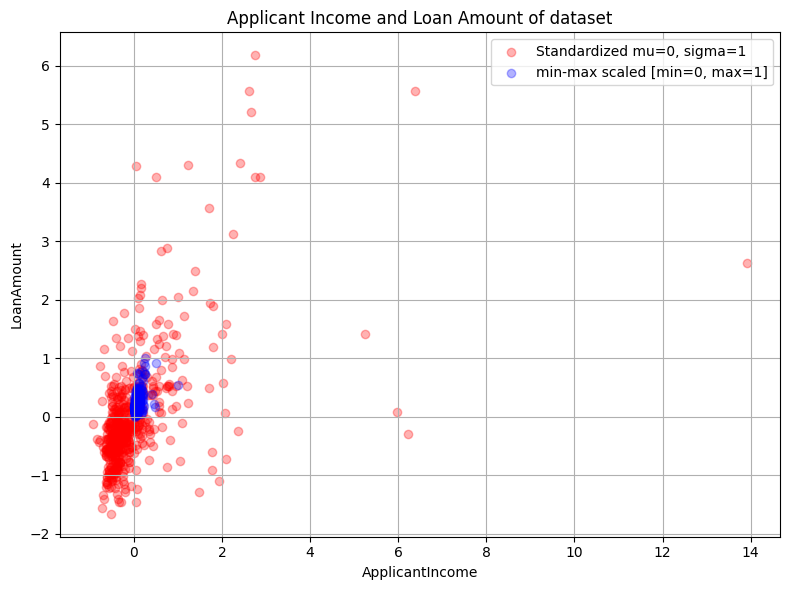

In [77]:
def plot():
    plt.figure(figsize=(8,6))

   # plt.scatter(tree_loan['ApplicantIncome'], tree_loan['LoanAmount'],
    #        color='green', label='input scale', alpha=0.5)

    plt.scatter(std_tree_loan[:,0], std_tree_loan[:,1], color='red',
            label='Standardized mu=0, sigma=1', alpha=0.3)

    plt.scatter(norm_tree_loan[:,0], norm_tree_loan[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Applicant Income and Loan Amount of dataset')
    plt.xlabel('ApplicantIncome')
    plt.ylabel('LoanAmount')
    plt.legend(loc='upper right')
    plt.grid()

    plt.tight_layout()

plot()

In [11]:
#Robust scaler
from sklearn.preprocessing import RobustScaler
rob = RobustScaler(with_centering=True, with_scaling=True)
rob_tree_loan = rob.fit_transform(tree_loan.loc[:,tree_loan.dtypes !=object])
print("Mean: ", rob_tree_loan.mean(axis=0))
print("S.D: ", rob_tree_loan.std(axis=0))
print("Min: ", rob_tree_loan.min(axis=0))
print("Max: ", rob_tree_loan.max(axis=0))

Mean:  [0.48862832 0.25140327]
S.D:  [1.86248514 1.17708425]
Min:  [-1.26320294 -1.69784173]
Max:  [26.41804331  7.52517986]


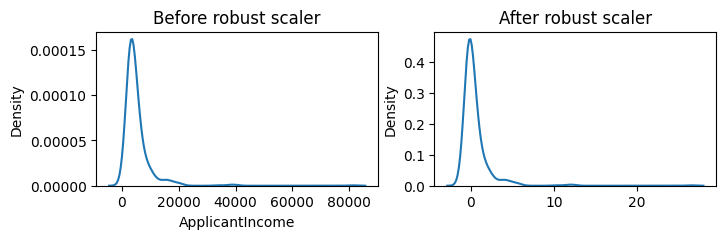

In [9]:
draw_plt(rob_tree_loan[:,0], "robust scaler")

In [ ]:
#Max Abs Scaler
#Quantile Transformer Scaler
#Power Transformer Scaler
#Unit Vector Scaler

<h1>Numerical Transformations

In [47]:
#log transformation
log_tree_loan = np.log(tree_loan['ApplicantIncome'])
print("Mean: ", log_tree_loan.mean(axis=0))
print("S.D: ", log_tree_loan.std(axis=0))
print("Min: ", log_tree_loan.min(axis=0))
print("Max: ", log_tree_loan.max(axis=0))

Mean:  8.343736569783967
S.D:  0.610557115473133
Min:  5.0106352940962555
Max:  11.302204433654575


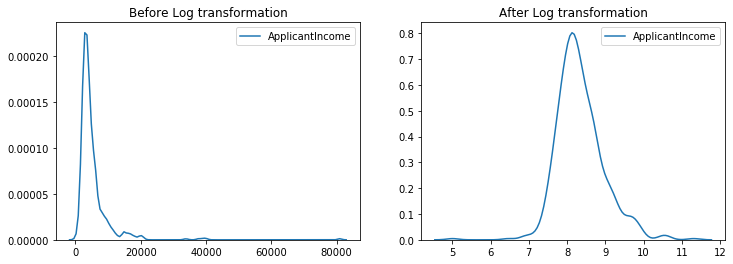

In [22]:
draw_plt(log_tree_loan, "Log transformation")

In [13]:
#box-cox transformation
from scipy import stats, special
boxcox_tree_loan, b_lambda = stats.boxcox(tree_loan['ApplicantIncome'])
print("Mean: ", boxcox_tree_loan.mean(axis=0))
print("S.D: ", boxcox_tree_loan.std(axis=0))
print("Min: ", boxcox_tree_loan.min(axis=0))
print("Max: ", boxcox_tree_loan.max(axis=0))
print("Lambda:", b_lambda)

Mean:  4.875722175049485
S.D:  0.18363943129276994
Min:  3.5827809333543157
Max:  5.620218089821839
Lambda: -0.14230476363395833


In [15]:
# Next, fit your model to the Box-Cox transformed data. You must revert your data to its original scale when you are ready to make predictions.
special.inv_boxcox(boxcox_tree_loan, b_lambda)

array([ 4583.,  3000.,  2583.,  6000.,  5417.,  2333.,  3036.,  4006.,
       12841.,  3200.,  3073.,  1853.,  1299.,  4950.,  3596.,  3510.,
        4887.,  7660.,  5955.,  2600.,  9560.,  2799.,  4226.,  1442.,
        3167.,  4692.,  3500., 12500.,  1828.,  3667.,  4166.,  3748.,
        3600.,  1800.,  2400.,  3941.,  4695.,  3410.,  5649.,  5821.,
        2645.,  4000.,  1928.,  3086.,  4230.,  4616., 11500.,  2708.,
        2132.,  3366.,  8080.,  3357.,  2500.,  3029.,  2609.,  4166.,
        5726.,  3200., 10750.,  7100.,  4300.,  3208.,  1875.,  3500.,
        4755.,  5266.,  3750.,  3750.,  1000.,  3167.,  3333.,  3846.,
        1378.,  6000.,  3988.,  2366.,  3333.,  2500.,  8566.,  5695.,
        2958.,  6250.,  3273.,  4133.,  3620.,  2484.,  1977.,  4188.,
        1759.,  4288.,  4843.,  3052., 11417.,  3800.,  2071.,  5316.,
        3572., 14583.,  3167.,  2214.,  5568., 10408.,  5667.,  4166.,
        2137.,  2957.,  4300.,  3692., 10513.,  6080., 20166.,  2014.,
      

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

Text(0.5, 1.0, 'No transformation')

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

Text(0.5, 1.0, 'Log transformation')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Box-Cox transformation')

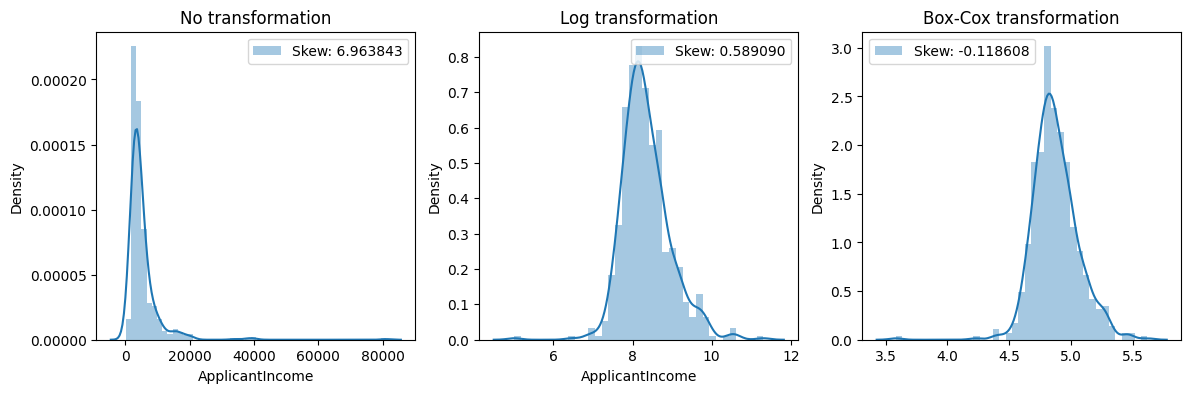

In [48]:
f = plt.figure(figsize=(14,4))
ax1 = f.add_subplot(131)
sns.distplot(tree_loan['ApplicantIncome'], label="Skew: %2f" %stats.skew(tree_loan['ApplicantIncome']), ax=ax1)
ax1.set_title('No transformation')
ax2 = f.add_subplot(132)
sns.distplot(log_tree_loan, label="Skew: %2f" %stats.skew(log_tree_loan), ax = ax2)
ax2.set_title('Log transformation')
ax3 = f.add_subplot(133)
sns.distplot(boxcox_tree_loan, label="Skew: %2f" %stats.skew(boxcox_tree_loan), ax = ax3)
ax3.set_title('Box-Cox transformation')
ax1.legend()
ax2.legend()
ax3.legend()

In [ ]:
#binarize
from sklearn.preprocessing import binarize
#convert to 0 or 1 based on threshold values

<h1>Categorical - Encoding

In [51]:
#binary encoding
import category_encoders as ce
df = pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school']})

ce_binary = ce.BinaryEncoder(cols = ['Degree'])
ce_binary.fit_transform(df['Degree'])

,Degree_0,Degree_1,Degree_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,0
5,0,1,0
6,1,0,1
7,0,0,1
8,0,0,1


In [51]:
#ordinal endoding/ label encoding
ce_ordinal = ce.OrdinalEncoder()
ce_ordinal.fit_transform(df['Degree'])

#from sklearn.preprocessing import LabelEncoder
#label_enc = LabelEncoder()
#label_enc.fit_transform(df['Degree'])


,Degree
0,1
1,2
2,3
3,4
4,4
5,2
6,5
7,1
8,1


In [53]:
#one hot
ce_onehot =ce.OneHotEncoder(cols='Degree',handle_unknown='return_nan',return_df=True,use_cat_names=True)
ce_onehot.fit_transform(df['Degree'])

,Degree_High school,Degree_Masters,Degree_Diploma,Degree_Bachelors,Degree_Phd
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0


In [54]:
#dummy coding
pd.get_dummies(df['Degree'])

,Bachelors,Diploma,High school,Masters,Phd
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,0,0,0,1,0
6,0,0,0,0,1
7,0,0,1,0,0
8,0,0,1,0,0


In [69]:
#Effect / Sum/ Deviation encoding
ce_sum = ce.SumEncoder(cols ='Degree')
ce_sum.fit_transform(df['Degree'])

,intercept,Degree_0,Degree_1,Degree_2,Degree_3
0,1,1.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,1.0
5,1,0.0,1.0,0.0,0.0
6,1,-1.0,-1.0,-1.0,-1.0
7,1,1.0,0.0,0.0,0.0
8,1,1.0,0.0,0.0,0.0


In [72]:
#Hash encoding
ce_hash = ce.HashingEncoder(cols=['Degree'], hash_method='md5', n_components=3)
ce_hash.fit_transform(df['Degree'])

,col_0,col_1,col_2
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,1,0,0
8,1,0,0


In [41]:



#binning



In [46]:
tree_loan.query('Gender == "Female"')

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
17,Female,No,Graduate,No,3510,76.0,Urban,N
37,Female,Yes,Graduate,No,3667,144.0,Semiurban,Y
45,Female,No,Graduate,No,3410,88.0,Urban,Y
48,Female,Yes,Graduate,No,2645,120.0,Urban,N
49,Female,No,Graduate,No,4000,144.0,Semiurban,Y
...,...,...,...,...,...,...,...,...
582,Female,Yes,Graduate,No,3166,36.0,Semiurban,Y
587,Female,No,Not Graduate,No,2165,70.0,Semiurban,Y
604,Female,Yes,Graduate,No,12000,496.0,Semiurban,Y
609,Female,No,Graduate,No,2900,71.0,Rural,Y


In [60]:
tree_loan.where(tree_loan["Gender"] == "Female")

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900.0,71.0,Rural,Y
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
